# hashtags frequency

In [1]:
import sys
from collections import Counter
import json

##### Collections: This module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.
Counter(): dict subclass for counting hashable objects


In [39]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

#### Above the tweet is a dict, which is converted using json.loads from a json tweet file.
dict in python is like the hashmap in java. there are key and values pairs.

The method get() returns a value for the given key. If key is not available then returns default value None.
dict.get(key, default=None)

*key -- This is the Key to be searched in the dictionary.

*default -- This is the Value to be returned in case key does not exist.



In [76]:
fname = 'Chap02-03\stream_donald_trump.jsonl'
i = -1
with open(fname,'r') as f:
    hashtags = Counter()
    for line in f:
        tweet = json.loads(line)
        hash = get_hashtags(tweet)
        i +=1
        if i <4 :
            print '========================='
            print type(hash)
            a = tweet
            hashtags.update(hash)
            print type(hashtags)
            print hashtags, '\n'
            
            print type(hashtags.most_common(2))
            print hashtags.most_common(2)

<type 'list'>
<class 'collections.Counter'>
Counter({u'np': 1, u'soundcloud': 1, u'trump2016': 1}) 

<type 'list'>
[(u'np', 1), (u'soundcloud', 1)]
<type 'list'>
<class 'collections.Counter'>
Counter({u'np': 1, u'soundcloud': 1, u'trump2016': 1}) 

<type 'list'>
[(u'np', 1), (u'soundcloud', 1)]
<type 'list'>
<class 'collections.Counter'>
Counter({u'np': 2, u'soundcloud': 2, u'trump2016': 2}) 

<type 'list'>
[(u'np', 2), (u'soundcloud', 2)]
<type 'list'>
<class 'collections.Counter'>
Counter({u'np': 2, u'soundcloud': 2, u'trump2016': 2, u'goldwatergirl': 1}) 

<type 'list'>
[(u'np', 2), (u'soundcloud', 2)]


In [55]:
entity = a.get('entities',{})
print type(a)
print entity

hash = entity.get('hashtags',[])
print hash

b = [tag['text'] for tag in hash]
print b

<type 'dict'>
{u'user_mentions': [{u'id': 355355420, u'indices': [3, 18], u'id_str': u'355355420', u'screen_name': u'StylishRentals', u'name': u'Stylish Rentals'}], u'symbols': [], u'hashtags': [{u'indices': [65, 75], u'text': u'Trump2016'}, {u'indices': [92, 103], u'text': u'SoundCloud'}, {u'indices': [105, 108], u'text': u'np'}], u'urls': [{u'url': u'https://t.co/XsABDu9Wse', u'indices': [109, 132], u'expanded_url': u'http://dld.bz/eC2cW', u'display_url': u'dld.bz/eC2cW'}]}
[{u'indices': [65, 75], u'text': u'Trump2016'}, {u'indices': [92, 103], u'text': u'SoundCloud'}, {u'indices': [105, 108], u'text': u'np'}]
[u'Trump2016', u'SoundCloud', u'np']


In [78]:
fname = 'Chap02-03\stream_donald_trump.jsonl'
with open(fname, 'r') as f:
    hashtags = Counter()           # <class 'collections.Counter'>
    for line in f:                 # each line is a json tweet
        tweet = json.loads(line)   # here conovert a json tweet into a dictionary
        hashtags_in_tweet = get_hashtags(tweet)  # return a list
        hashtags.update(hashtags_in_tweet)
    for tag, count in hashtags.most_common(10):
        print("{}: {}".format(tag, count))

trump2016: 132
soundcloud: 131
np: 131
trump: 22
maga: 7
election2016: 5
hillary: 5
trumptrain: 5
neverhillary: 4
news: 4


#### The above with statement will automatically close the file after the nested block of code. 
The advantage of using a with statement is that it is guaranteed to close the file no matter how the nested block exits. If an exception occurs before the end of the block, it will close the file before the exception is caught by an outer exception handler. 

If the nested block were to contain a return statement, or a continue or break statement, the with statement would automatically close the file in those cases, too.

# Text Analysis

###### tokenization is the process of breaking the text into individual units called tokens.
becasue the content of a tweet includes emoticons, hashtags, user mentions, URLs, and is quite different from standard english. for this reason, we use TweetTokenizer(NLTK library). 

##### stopwords are words, that are not content-bearing when the words are taken in isolation.  The typical words include articles, propositions, adverbs and so on. 

##### Normalization is used when we need to aggregate different terms in the same unit. 
one special case of normalization is case normalization, where every term is lowercase so that strings with originally differenct casing will 

In [174]:
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

b=TweetTokenizer()
print type(b), '\n'

a = tokenizer.tokenize("great idea")
print type(a), a
print type(b.tokenize('great idea')), b.tokenize('great Idea'), '\n'

print type(string.punctuation), string.punctuation
print type(stopwords.words('english')), stopwords.words('english')

<type 'instance'> 

<type 'list'> [u'great', u'idea']
<type 'list'> [u'great', u'Idea'] 

<type 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
<type 'list'> [u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here',

In [180]:
## below is a dictionary data type. 
token_map = {
    "i'm": "i am",
    "you're": "you are",
    "it's": "it is",
    "we're": "we are",
    "we'll": "we will",
}
print type(token_map)
print token_map.keys()
print token_map.values()
print token_map.get("i'm")
print token_map["we'll"].split()

<type 'dict'>
["you're", "i'm", "we'll", "we're", "it's"]
['you are', 'i am', 'we will', 'we are', 'it is']
i am
['we', 'will']


In [191]:
def normalize_contractions(tokens):  # << here tokens is a list
    """Example of normalization for English contractions.
    
    Return: generator
    """
    token_map = {
        "i'm": "i am",
        "you're": "you are",
        "it's": "it is",
        "we're": "we are",
        "we'll": "we will",
    }
    for tok in tokens:
        if tok in token_map.keys():
            for item in token_map[tok].split():
                yield item
        else:
            yield tok
            
a = normalize_contractions(['great', 'idea','#what',"we'll"])
print type(a), a
for i in a:
    print i

<type 'generator'> <generator object normalize_contractions at 0x0000000008508C60>
great
idea
#what
we
will


To understand what yield does, you must understand what generators are. And before generators come iterables.

**Iterables**

When you create a list, you can read its items one by one. Reading its items one by one is called iteration. 

**Yield**

Yield is a keyword that is used like return, except the function will return a generator.

**Generators**

Generators are iterators, but you can only iterate over them once. It's because they do not store all the values in memory, they generate the values on the fly:

**Tips**

The normalize_contractions() function uses the yield keyword instead of return. This keyword is used to produce a generator, which is an iterator that you can only iterate over once, as it doesn't store its items in the memory, but generates them on the
fly. One of the advantages is to reduce memory consumption, so it's recommendable for iterations over big objects. The keyword also allows to generate multiple items within the same function call, while return would close the computation as soon as it's called (for example, the for loop in normalize_contractions() would run only over the first
token).

In [182]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    """Process the text of a tweet:
    - Lowercase
    - Tokenize
    - Stopword removal
    - Digits removal

    Return: list of strings
    """
    text = text.lower()
    tokens = tokenizer.tokenize(text)  ## a list
    # If we want to normalize contraction, uncomment this
    tokens = normalize_contractions(tokens) ##
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]
                                    ## if the word in stopwords or is digit, then will be removed from the text. 

In [195]:
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt', 'via','...']

print type(punct), punct,'\n'
print type(stopword_list), stopword_list

<type 'list'> ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~'] 

<type 'list'> [u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'agai

In [194]:
fname = 'Chap02-03\stream_donald_trump.jsonl'
tf = Counter()
with open(fname, 'r') as f:
    for line in f:
        tweet = json.loads(line)
        tokens = process(text=tweet.get('text', ''),
                         tokenizer=tweet_tokenizer,
                         stopwords=stopword_list)
        tf.update(tokens)
    for tag, count in tf.most_common(20):
        print "{}: {}".format(tag.encode("utf-8"), count)
        #print tag,':',count

trump: 427
donald: 194
…: 155
president: 138
#trump2016: 132
heard: 131
#soundcloud: 131
https://t.co/xsabdu9wse: 131
rickpoppe: 131
@stylishrentals: 131
vote: 52
’: 44
hillary: 31
�: 28
�: 28
trump's: 28
clinton: 27
melania: 26
blasts: 22
accusers: 22


In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

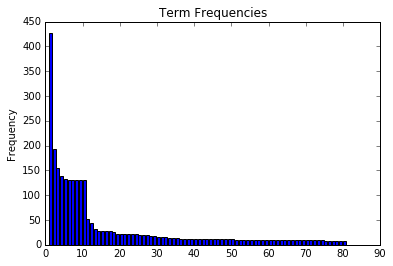

In [208]:
y = [count for tag, count in tf.most_common(80)]
x = range(1, len(y)+1)
plt.bar(x, y)
plt.title("Term Frequencies")
plt.ylabel("Frequency")
plt.savefig('Chap02-03/term_distribution.png')

The above figure represents an approximation of a power law. In statistics, a power law is a functional
relationship between two quantities; in this case, the frequency of a term and its position
within the ranking of terms by frequency.

This type of distribution always shows a long tail meaning that a small portion of frequent items
dominate the distribution, while there is a large number of items with smaller frequencies.

Another name for this phenomenon is **the 80-20 rule** or Pareto principle